In [1]:
import pandas as pd
import re 
import spacy 
import os 
import numpy as np

In [2]:
nlp = spacy.load("en_core_web_sm")

## Share paths

In [3]:
#df = pd.read_csv("../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/06_clean_data/05182020_cleaned_english_resumes_V1.0.csv")

In [4]:
#df_train = pd.read_csv("../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/02_eda_data/output/train_dataset.csv")

## Local Paths

In [5]:
df = pd.read_csv("../../data/input/feature_extraction/05182020_cleaned_english_resumes_V1.0.csv")

In [6]:
df.head(3)

,Unnamed: 0,employee_name,employee_code,store,raw_resume,resume_text,resume_bline,language,file_type,clean_text
0,0,"Abbasi, Samiee Z",N42,WW 374,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"Samiee Zahid Abbasi 61 Muscat Crescent Ajax, ...","['', '', '', '', '', '', '', '', '', '', '', '...",English,docx,Zahid Muscat Crescent look build great work fa...
1,1,"Abdi, Melika",N3O,TB 146,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Skills Experience MELIKA ABDI Carmelo Avenue ...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,pdf,Skills Experience Carmelo Avenue Ph ability wo...
2,2,"Abdulali, Kaizar",BDP,WW 252,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,KAIZAR ABDULALI kaizar83@gmail.com | 780 990-...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,pdf,thank consideration role Project Manager Busin...


In [7]:
df_train = pd.read_csv("../../data/input/feature_extraction/0607_02_training_dataset.csv")

In [8]:
df_train.head(2)

,employee_code,rehired_,referral_flag,job_hopper,average_tenure_per_job,shortest_tenure,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,...,telco_electro_jobs,telco_electro_recency,recency_type_telco_electro_exp,no_job_categorical,telco_electro_perc_group,read_score_categorical,flag_hd_bachelor_plus,flag_hd_highschool,business_flag,no_jobs
0,MZE,No,1.0,0.0,22.00,14.0,1,0,0,0,...,1,2,low,few,significant,low,0,1,0,2
1,MRU,No,0.0,0.0,12.33,3.0,1,0,0,0,...,1,1,high,multiple,significant,high,0,0,0,3


In [9]:
df_train_code = df_train[['employee_code', 'hp_class']]

In [10]:
df_resume = df[['employee_code', 'employee_name', 'clean_text', 'resume_text']]

In [34]:
df_resume_clean = df_train_code.merge(df_resume, on='employee_code')

In [35]:
df_resume_clean.head(2)

,employee_code,hp_class,employee_name,clean_text,resume_text
0,MZE,0.0,"Birla, Shelly",Avenue Tel reference available request objecti...,"SHELLY BIRLA 1293 Midland Avenue Toronto, ON ..."
1,MRU,0.0,"Williams, Dave",Resume obtain utilize opportunity grow benefit...,Indeed Resume Dave Williams To obtain and uti...


## "Team player" phrase  and "Team" word features

In [36]:
def communication_skills_manual(txt):
    txt = str(txt).lower()
    if any(x in txt for x in ['communic']):
        flag = 1
    else:
        flag = 0
    return flag

In [37]:
def communication_skills_phrase(txt):
    txt = str(txt).lower()
    #if re.search("communication skills", txt):
    if re.search(r"\b(comm?unic?[^\s]+ ?skill?s?)\b", txt):
        flag = 1
    else:
        flag = 0
    return flag

## Check Regex Pattern 

In [38]:
def regex_test(regex_pattern, wanna_capture_list):
    '''
    '''
    
    match_list =[]
    for item in wanna_capture_list:
        if re.search(regex_pattern, item):
            match_list.append(item)

    percentage_matched = round(len(match_list)/len(wanna_capture_list)*100,2)
    print("{} percent matched".format(percentage_matched))
    no_matched_list = list(set(wanna_capture_list) - set(match_list))
    print("NO MATCHED LIST: {}".format(no_matched_list))
    return match_list

#### Communication Skill words

In [39]:
wanna_capture_list  = ['communication skill', 'comunication skills', 'communicationskills', 
                       'comunicationskill', 'comunicatorskil','communicator skills', 'communicative skils']

regex_pattern = r"\b(comm?unic?[^\s]+ ?skill?s?)\b"

regex_test(regex_pattern, wanna_capture_list)

100.0 percent matched
NO MATCHED LIST: []


['communication skill',
 'comunication skills',
 'communicationskills',
 'comunicationskill',
 'comunicatorskil',
 'communicator skills',
 'communicative skils']

In [40]:
def communic_word(txt):
    txt = str(txt).lower()
    if re.search(r'\b(comm?unic[^\s]+)\b', txt):
        flag = 1
    else:
        flag = 0
    return flag

In [41]:
def communic_word_list(txt):
    txt = str(txt).lower()
    
    return list(set(re.findall(r'\b(comm?unic[^\s]+)\b', txt)))


In [42]:
df_resume_clean['communication_skills_manual'] = df_resume_clean.resume_text.apply(lambda x: communication_skills_manual(x))

df_resume_clean['communication_skills_phrase'] = df_resume_clean.resume_text.apply(lambda x: communication_skills_phrase(x))
df_resume_clean['communication_word_root'] = df_resume_clean.resume_text.apply(lambda x: communic_word(x))
df_resume_clean['communic_word_list'] = df_resume_clean.resume_text.apply(lambda x: communic_word_list(x))

df_resume_clean


,employee_code,hp_class,employee_name,clean_text,resume_text,communication_skills_manual,communication_skills_phrase,communication_word_root,communic_word_list
0,MZE,0.0,"Birla, Shelly",Avenue Tel reference available request objecti...,"SHELLY BIRLA 1293 Midland Avenue Toronto, ON ...",1,1,1,"[communication, communicating]"
1,MRU,0.0,"Williams, Dave",Resume obtain utilize opportunity grow benefit...,Indeed Resume Dave Williams To obtain and uti...,1,0,1,[communicate]
2,LAP,0.0,"Smith, Mandy",Employment History Hill August present sale Pr...,"Mandy Smith 410 Cartier Street, North Bay, ON...",1,0,1,[communication]
3,MYD,1.0,"Ren, Jingya Claire",Manston Cres career objective seek time sale r...,"Jingya Ren (Claire) 98 Manston Cres, Markham ...",1,1,1,[communication]
4,JJB,0.0,"Kumta, Ajit",Resume Contact LinkedIn Skills Microsoft Offic...,Resume Contact www.linkedin.com/in/ajitkumta ...,1,0,0,[]
...,...,...,...,...,...,...,...,...,...
283,N1Q,0.0,"Maisuri, Hetvi",Contact mail Technical Skills programming lang...,"HETVI MAISURI Burnaby, BC Contact No: 6045005...",1,0,1,[communication]
284,MTI,0.0,"Delaney, Jeremy",Jess Road Saint work experience January Januar...,Jess L Jeremy Delaney 300 Kingsville Road Sai...,0,0,0,[]
285,N8M,0.0,"Virani, Rushabh",ARVI Thorncliffe Park CAREER OBJECTIVE work re...,RUSHABH VIRANI (ARVI) 50 Thorncliffe Park Dr....,1,1,1,"[communication, communicating]"
286,MZX,0.0,"Haghighat-Parast, Shawnar",PARAST lph Yonge st job OBJECTIVE gain profess...,SHAWNAR PARAST LPH 19 9471 Yonge st Richmond ...,0,0,0,[]


### List of words catched by communic_word regex

In [43]:
x=df_resume_clean.communic_word_list.to_list()
list(set([j for i in x for j in i]))

['communication',
 'communicative',
 'communicated',
 'communication/phone',
 'communicate',
 'communicating',
 'communicator',
 'communications',
 'communication/presentation',
 'communicates']

In [44]:
# df_resume_clean[df_resume_clean['team_player']==1]['resume_text'].sample(n=1).iloc[0]

## Keyword Statistics

In [45]:
df_resume_clean[df_resume_clean['communication_skills_manual']==1].count()

employee_code                  205
hp_class                       205
employee_name                  205
clean_text                     205
resume_text                    205
communication_skills_manual    205
communication_skills_phrase    205
communication_word_root        205
communic_word_list             205
dtype: int64

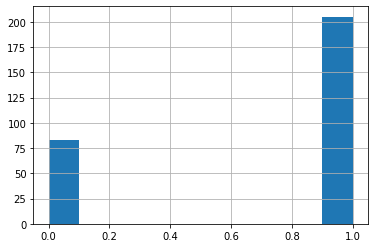

In [46]:
df_resume_clean.communication_skills_manual.hist()

In [47]:
df_resume_clean[df_resume_clean['communication_skills_phrase']==1].count()

employee_code                  94
hp_class                       94
employee_name                  94
clean_text                     94
resume_text                    94
communication_skills_manual    94
communication_skills_phrase    94
communication_word_root        94
communic_word_list             94
dtype: int64

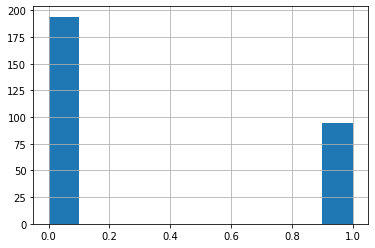

In [48]:
df_resume_clean.communication_skills_phrase.hist()

In [49]:
df_resume_clean[df_resume_clean['communication_word_root']==1].count()

employee_code                  202
hp_class                       202
employee_name                  202
clean_text                     202
resume_text                    202
communication_skills_manual    202
communication_skills_phrase    202
communication_word_root        202
communic_word_list             202
dtype: int64

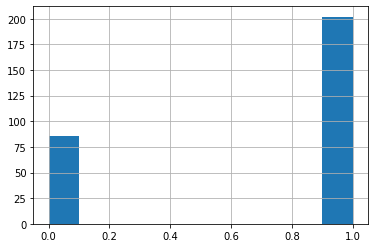

In [50]:
df_resume_clean.communication_word_root.hist()

In [51]:
df_resume_clean.describe()

,hp_class,communication_skills_manual,communication_skills_phrase,communication_word_root
count,288.000000,288.000000,288.000000,288.000000
mean,0.243056,0.711806,0.326389,0.701389
std,0.429675,0.453710,0.469708,0.458446
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# Generate Ouput

In [52]:
df_resume_clean = df_resume_clean.drop(['hp_class', 'employee_name', 'clean_text', 'resume_text', 'communic_word_list'], axis=1)

In [55]:
df_resume_clean.to_csv('../../data/output/feature_extraction/auto_communic_word_related_features.csv')

In [33]:
#df_resume_clean.to_csv('../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/06_clean_data/auto_education_concentration.csv')

# Generate Function

### Package installation missing:

In [ ]:
# docopt
#conda install -c anaconda docopt